# Assigment 2

## Problem 1: Investigation of the Diameter, Height and Volume for Black Cherry Trees

Import data from `trees.csv`.

In [2]:
tree.data = read.csv("trees.csv")

In [28]:
library(ROCR);

Warning message:
"package 'ROCR' was built under R version 4.0.5"


### 1. Fit four polynomial models (deg=1,2,3,4) to predict the Volume using Girth. 
Choose the model with the largest adjust R-squared. 
Plot the polynomial function of the model and also plot the confidence bands with ±2 standard error.

In [38]:
summary(lm(Volume~poly(Girth,1),data=tree.data))


Call:
lm(formula = Volume ~ poly(Girth, 1), data = tree.data)

Residuals:
   Min     1Q Median     3Q    Max 
-8.065 -3.107  0.152  3.495  9.587 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     30.1710     0.7637   39.51   <2e-16 ***
poly(Girth, 1)  87.0734     4.2520   20.48   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.252 on 29 degrees of freedom
Multiple R-squared:  0.9353,	Adjusted R-squared:  0.9331 
F-statistic: 419.4 on 1 and 29 DF,  p-value: < 2.2e-16


In [39]:
summary(lm(Volume~poly(Girth,2),data=tree.data))


Call:
lm(formula = Volume ~ poly(Girth, 2), data = tree.data)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.4889 -2.4293 -0.3718  2.0764  7.6447 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      30.1710     0.5989  50.374  < 2e-16 ***
poly(Girth, 2)1  87.0734     3.3348  26.111  < 2e-16 ***
poly(Girth, 2)2  14.5918     3.3348   4.376 0.000152 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.335 on 28 degrees of freedom
Multiple R-squared:  0.9616,	Adjusted R-squared:  0.9588 
F-statistic: 350.5 on 2 and 28 DF,  p-value: < 2.2e-16


In [40]:
summary(lm(Volume~poly(Girth,3),data=tree.data))


Call:
lm(formula = Volume ~ poly(Girth, 3), data = tree.data)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.4462 -2.3220 -0.4896  2.0225  7.4458 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      30.1710     0.6009  50.213  < 2e-16 ***
poly(Girth, 3)1  87.0734     3.3454  26.028  < 2e-16 ***
poly(Girth, 3)2  14.5918     3.3454   4.362 0.000169 ***
poly(Girth, 3)3   3.0335     3.3454   0.907 0.372553    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.345 on 27 degrees of freedom
Multiple R-squared:  0.9627,	Adjusted R-squared:  0.9586 
F-statistic: 232.4 on 3 and 27 DF,  p-value: < 2.2e-16


In [41]:
summary(lm(Volume~poly(Girth,4),data=tree.data))


Call:
lm(formula = Volume ~ poly(Girth, 4), data = tree.data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.9337 -2.3103 -0.0573  2.0278  7.7704 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      30.1710     0.6071  49.700  < 2e-16 ***
poly(Girth, 4)1  87.0734     3.3800  25.761  < 2e-16 ***
poly(Girth, 4)2  14.5918     3.3800   4.317 0.000204 ***
poly(Girth, 4)3   3.0335     3.3800   0.897 0.377694    
poly(Girth, 4)4  -2.2684     3.3800  -0.671 0.508053    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.38 on 26 degrees of freedom
Multiple R-squared:  0.9634,	Adjusted R-squared:  0.9577 
F-statistic: 170.9 on 4 and 26 DF,  p-value: < 2.2e-16


From above summary of each poly model, we can see the poly model of degree 2 has the largest adjust R-squared.

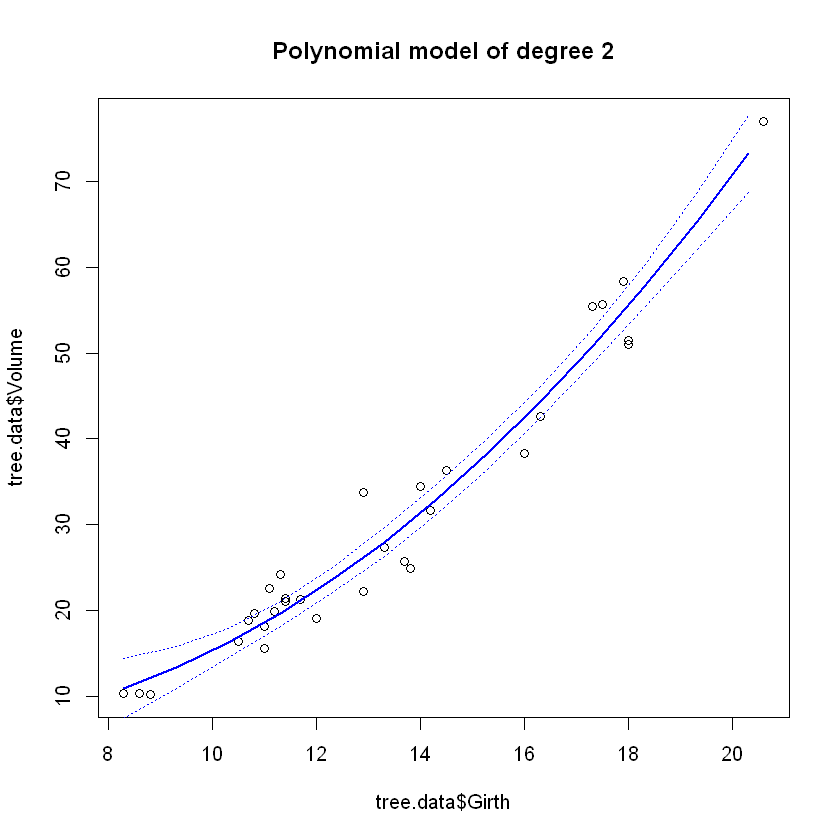

In [58]:
poly.fit=lm(Volume~poly(Girth,2),data=tree.data)

girth.lims=range(tree.data$Girth)
girth.grid=seq(from=girth.lims[1],to=girth.lims[2])
poly.preds=predict(poly.fit,newdata=list(Girth=girth.grid),se=T)
se.bands=cbind(poly.preds$fit+2*poly.preds$se.fit,poly.preds$fit-2*poly.preds$se.fit)
plot(tree.data$Girth,tree.data$Volume)
lines(girth.grid,poly.preds$fit,lwd=2,col="blue")
matlines(girth.grid,se.bands,lwd=1,col="blue",lty=3)
title("Polynomial model of degree 2")

### 2. Use a polynomial logistic regression model with deg=2 to predict whether the Volume is larger or not than 30, using the variable Girth. 
Plot the function P (Volume > 30) with respect to Girth and the confidence bands with ±2 standard error.

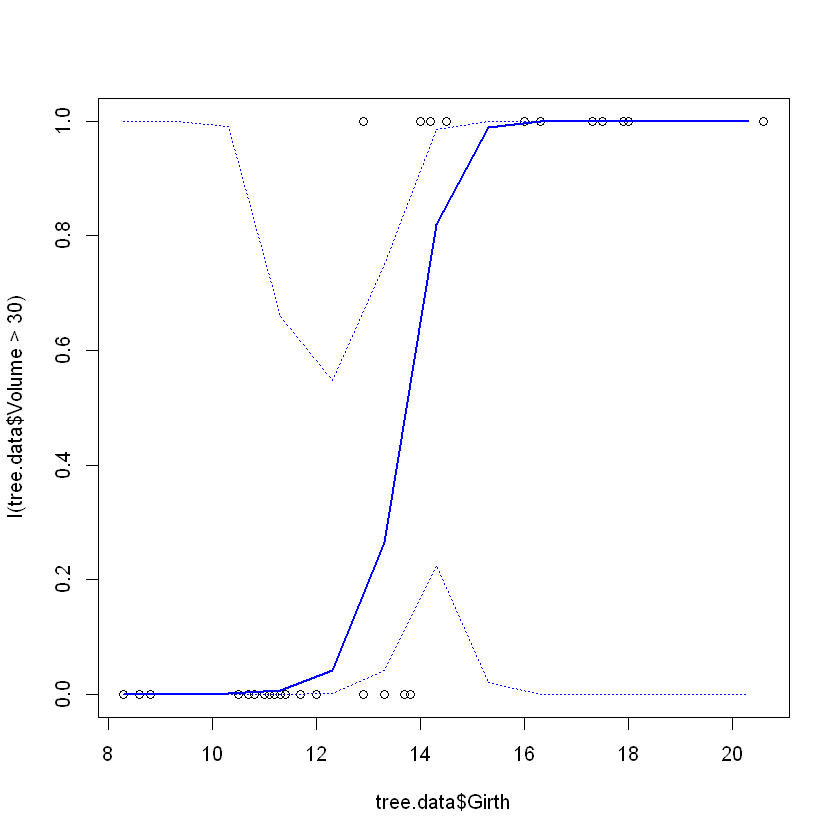

In [68]:
fit=glm(I(Volume>30)~poly(Girth,2),data=tree.data,family=binomial)
preds=predict(fit,newdata=list(Girth=girth.grid),se=T)
pfit=1-1/(1+exp(preds$fit))
se.bands.logit=cbind(preds$fit+2*preds$se.fit,preds$fit-2*preds$se.fit)
se.bands=1-1/(1+exp(se.bands.logit))
plot(tree.data$Girth,I(tree.data$Volume>30))
lines(girth.grid,pfit,lwd=2,col="blue")
matlines(girth.grid,se.bands,lwd=1,lty=3,col="blue")

### 3. Fit a regression spline with deg=2 to predict the Volume using the variable Girth at knots 10, 14, 18. 
Plot the function and also the confidence bands with ±2 standard error.

Warning message in min(x):
"min里所有的参数都不存在; 回覆Inf"
Warning message in max(x):
"max里所有的参数都不存在；回覆-Inf"


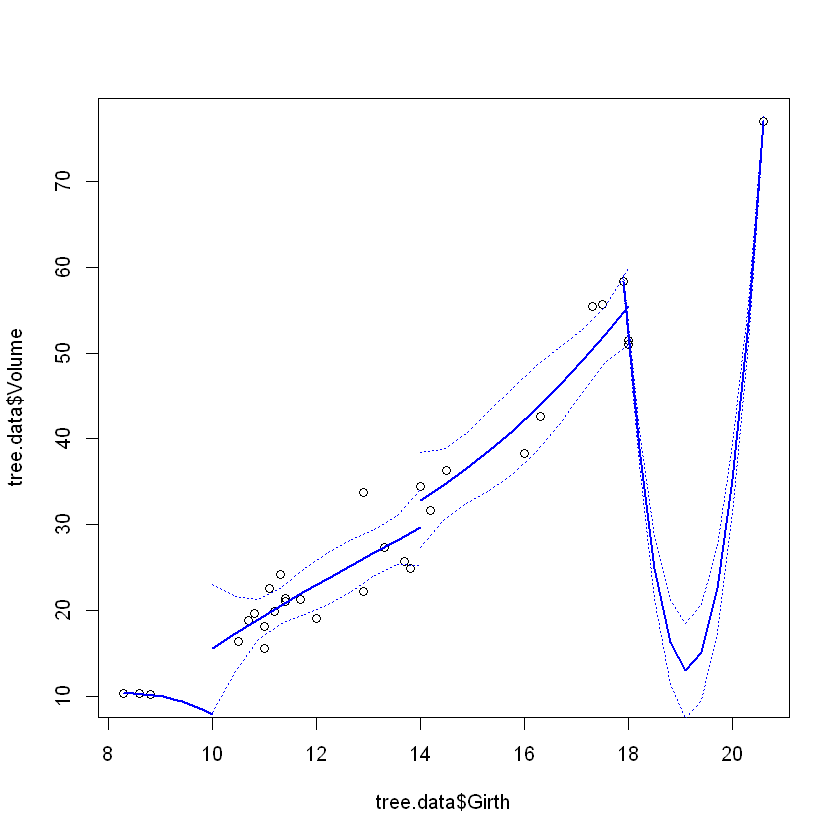

In [117]:
girth.lims=range(tree.data$Girth)
intervals=list(c(girth.lims[1],10),c(10,14),c(14,18),c(17.9,girth.lims[2]))
plot(tree.data$Girth,tree.data$Volume)
for(interval in intervals){
    data=tree.data[which(as.logical((interval[1] <= tree.data$Girth) * (tree.data$Girth <= interval[2]))),]
    girth.grid=seq(from=interval[1],to=interval[2],length.out=10)
    poly.fit=lm(Volume~poly(Girth,2),data=data)
    poly.preds=predict(poly.fit,newdata=list(Girth=girth.grid),se=T)
    se.bands=cbind(poly.preds$fit+2*poly.preds$se.fit,poly.preds$fit-2*poly.preds$se.fit)
    lines(girth.grid,poly.preds$fit,lwd=2,col="blue")
    matlines(girth.grid,se.bands,lwd=1,col="blue",lty=3)
}

### 4. Fit a smoothing spline to predict the Volume using the variable Girth where the smoothing level is chosen by Cross-Validation. 
Plot the function. What is the used degrees of freedom?

In [124]:
fit=smooth.spline(tree.data$Girth,tree.data$Volume,cv=T)
cat("used degrees of freedom =",fit$df)

Warning message in smooth.spline(tree.data$Girth, tree.data$Volume, cv = T):
"cross-validation with non-unique 'x' values seems doubtful"


used degrees of freedom = 3.87138

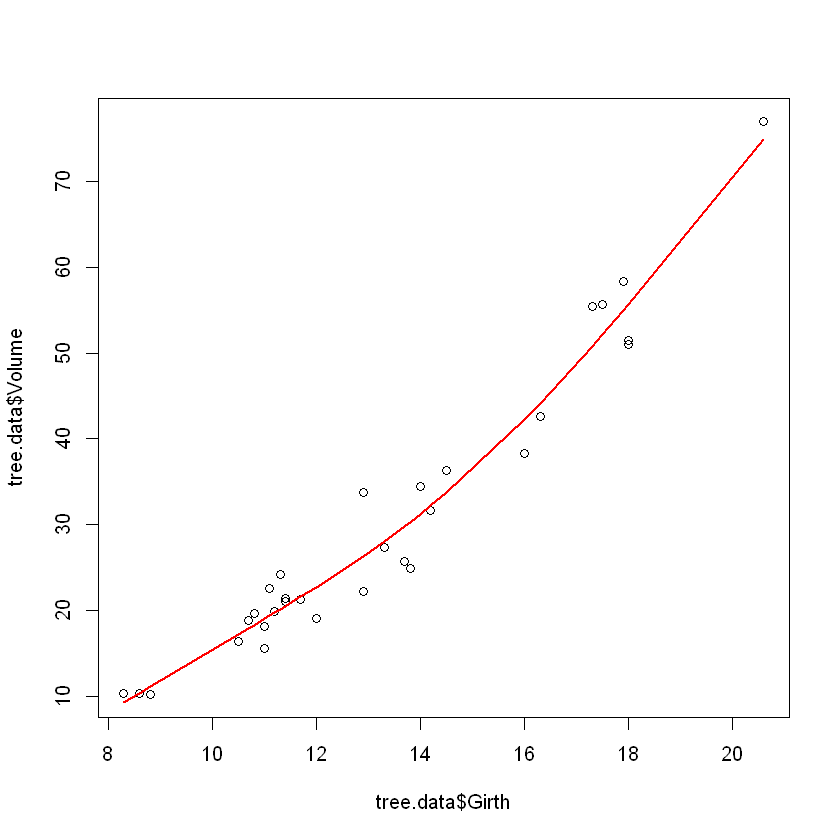

In [132]:
plot(tree.data$Girth,tree.data$Volume)
lines(fit,col="red",lwd=2)

### 5. Use both the variable Girth and Height to predict the Volume by a GAM 
where the individual function on Girth is a smoothing spline with df=4 and the function on Height is a smoothing spline with df=5. Plot the functions and also the confidence bands.

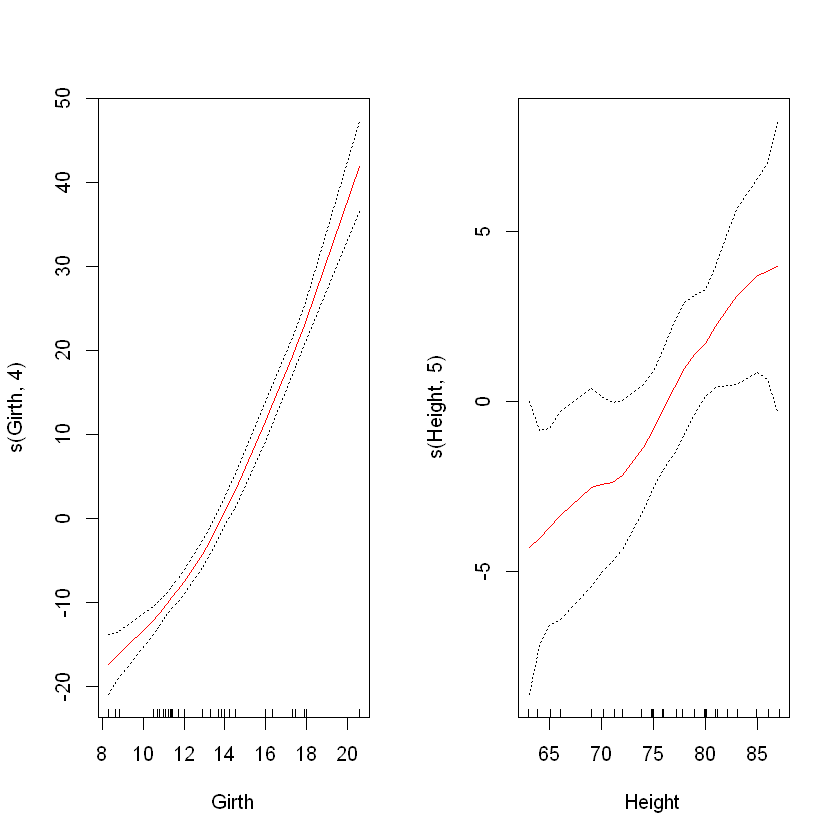

In [131]:
library(gam);

gam.mod=gam(Volume~s(Girth,4)+s(Height,5),data=tree.data)
par(mfrow=c(1,2))
plot(gam.mod,se=T,col="red")

## Problem 2: Audit Risk

First of all, import all train and test dataset.

In [152]:
audit.train=read.csv("audit_train.csv")
audit.test=read.csv("audit_test.csv")
audit.train$Risk=as.factor(audit.train$Risk)
audit.train$LOCATION_ID=as.factor(audit.train$LOCATION_ID)

### 1. Use the train dataset to fit a classification tree and, plot the tree and report the training error. 
Test the performance on the test dataset and report the confusion matrix.

In [136]:
library(tree);

Warning message:
"package 'tree' was built under R version 4.0.5"


In [153]:
tree.mod=tree(Risk~.,audit.train)

ERROR: Error in tree(Risk ~ ., audit.train): factor predictors must have at most 32 levels


In [145]:
?as.factor

factor {base},R Documentation
x,"a vector of data, usually taking a small number of distinct values."
levels,"an optional vector of the unique values (as character strings) that x might have taken. The default is the unique set of values taken by as.character(x), sorted into increasing order of x. Note that this set can be specified as smaller than sort(unique(x))."
labels,"either an optional character vector of labels for the levels (in the same order as levels after removing those in exclude), or a character string of length 1. Duplicated values in labels can be used to map different values of x to the same factor level."
exclude,a vector of values to be excluded when forming the set of levels. This may be factor with the same level set as x or should be a character.
ordered,logical flag to determine if the levels should be regarded as ordered (in the order given).
nmax,an upper bound on the number of levels; see ‘Details’.
...,"(in ordered(.)): any of the above, apart from ordered itself."
ifany,"only add an NA level if it is used, i.e. if any(is.na(x))."
